<a href="https://colab.research.google.com/github/albanda/CE888/blob/master/lab4-recommender/rec_latent.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Latent Factor Models for Collaborative Filtering

Load required libraries

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
np.set_printoptions(precision=3)

Now load the data

In [194]:
data = pd.read_excel("https://raw.githubusercontent.com/albanda/CE888-2023/main/lab4-recommenders/movies_latent_factors.xlsx", sheet_name='Items')
data_u = pd.read_excel("https://raw.githubusercontent.com/albanda/CE888-2023/main/lab4-recommenders/movies_latent_factors.xlsx", sheet_name='Users')

In [219]:
movie = data[data['Movie ID'] == 155]

In [220]:
movie

,Movie ID,Title,Factor1,Factor2,Factor3,Factor4,Factor5,Factor6,Factor7,Factor8,Factor9,Factor10,Factor11,Factor12,Factor13,Factor14,Factor15
21,155,The Dark Knight (2008),-2.169359,-1.131584,-0.23918,-0.556938,-1.473591,-0.739988,1.351486,-1.679131,0.133108,-0.943399,-1.135594,-0.179583,2.193465,0.720142,0.445634


In [221]:
movie = movie.drop(['Movie ID', 'Title'], axis=1)

In [222]:
movie.shape

(1, 15)

In [233]:
user= data_u[data_u['User'] == 4469]

In [234]:
user

,User,Factor1,Factor2,Factor3,Factor4,Factor5,Factor6,Factor7,Factor8,Factor9,Factor10,Factor11,Factor12,Factor13,Factor14,Factor15
8,4469,-0.030528,-0.011537,-0.042822,-0.014378,0.031338,0.012297,-0.000038,-0.010264,-0.006781,-0.01995,-0.014435,0.010926,0.0244,0.005318,-0.007983


In [225]:
user = user.drop(['User'], axis=1)

In [226]:
user.shape

(1, 15)

In [227]:
user_ratings = user.values

In [228]:
item = movie.values

In [229]:
n_latent_factors = 2

# Initialise as random values
latent_user_preferences = np.random.random((user_ratings.shape[0], n_latent_factors))
latent_item_features = np.random.random((item.shape[0], n_latent_factors))

In [230]:
latent_item_features

array([[0.709, 0.599]])

In [231]:
latent_user_preferences

array([[0.375, 0.295]])

In [232]:
predict_rating(0, 0)

np.float64(0.44243612844996527)

In [ ]:
def predict_rating(user_id, item_id):
    """ Predict a rating given a user_id and an item_id.
    """
    user_preference = latent_user_preferences[user_id]
    item_preference = latent_item_features[item_id]
    return user_preference.dot(item_preference)


def train(user_id, item_id, rating, alpha=0.0001):
    #print(item_id)
    predicted_rating = predict_rating(user_id, item_id)
    err =  predicted_rating - rating
    #print(err)
    user_pref_values = latent_user_preferences[user_id]
    latent_user_preferences[user_id] -= alpha * err * latent_item_features[item_id]
    latent_item_features[item_id] -= alpha * err * user_pref_values
    return err
    
def sgd(iterations):
    """ Iterate over all users and all items and train for 
        a certain number of iterations
    """
    mse_history = []
    for iteration in range(iterations):
        error = []
        for user_id in range(latent_user_preferences.shape[0]):
            for item_id in range(latent_item_features.shape[0]):
                rating = user_ratings[user_id, item_id]
                if not np.isnan(rating):
                    err = train(user_id, item_id, rating)
                    error.append(err)
        mse = (np.array(error) ** 2).mean()   
        if (iteration % 10000) == 0:
            print('Iteration %d/%d:\tMSE=%.6f' % (iteration, iterations, mse))
            mse_history.append(mse)
    return mse_history

In [ ]:
def domain(iterations):
    """ Iterate over all users and all items and train for 
        a certain number of iterations
    """
    mse_history = []
    for iteration in range(iterations):
        error = []
        for user_id in range(latent_user_preferences.shape[0]):
            for item_id in range(latent_item_features.shape[0]):
                rating = user_ratings[user_id, item_id]
                if not np.isnan(rating):
                    err = train(user_id, item_id, rating)
                    error.append(err)
        mse = (np.array(error) ** 2).mean()   
        if (iteration % 10) == 0:
            print('Iteration %d/%d:\tMSE=%.6f' % (iteration, iterations, mse))
            mse_history.append(mse)
    return mse_history

domain(100)

IndexError: index 1 is out of bounds for axis 0 with size 1

In [124]:
x = latent_item_features.flatten()
# .dot
# (latent_user_preferences[:2]).flatten()

In [127]:
y = (latent_user_preferences[:2]).flatten()
y_padded = np.pad(y, (0, len(x) ), 'constant')
y_padded

array([0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.])

In [128]:
x.dot(y_padded)

np.float64(0.0)

Iteration 0/300000:	MSE=25.748564
Iteration 10000/300000:	MSE=1.378170
Iteration 20000/300000:	MSE=1.340361
Iteration 30000/300000:	MSE=1.320571
Iteration 40000/300000:	MSE=1.289941
Iteration 50000/300000:	MSE=1.256576
Iteration 60000/300000:	MSE=1.233098
Iteration 70000/300000:	MSE=1.220401
Iteration 80000/300000:	MSE=1.213847
Iteration 90000/300000:	MSE=1.210266
Iteration 100000/300000:	MSE=1.208154
Iteration 110000/300000:	MSE=1.206821
Iteration 120000/300000:	MSE=1.205931
Iteration 130000/300000:	MSE=1.205312
Iteration 140000/300000:	MSE=1.204865
Iteration 150000/300000:	MSE=1.204534
Iteration 160000/300000:	MSE=1.204283
Iteration 170000/300000:	MSE=1.204090
Iteration 180000/300000:	MSE=1.203938
Iteration 190000/300000:	MSE=1.203818
Iteration 200000/300000:	MSE=1.203722
Iteration 210000/300000:	MSE=1.203644
Iteration 220000/300000:	MSE=1.203580
Iteration 230000/300000:	MSE=1.203528
Iteration 240000/300000:	MSE=1.203485
Iteration 250000/300000:	MSE=1.203450
Iteration 260000/300000:	

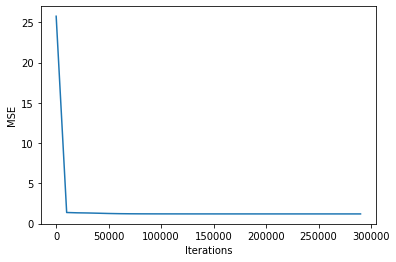

In [ ]:
num_iter = 300000
hist = sgd(num_iter)  # Note how the MSE decreases with the number of iterations
plt.figure()
plt.plot(np.arange(0, num_iter, 10000), hist)
plt.xlabel("Iterations")
plt.ylabel("MSE")
plt.show()

In [ ]:
predictions = latent_user_preferences.dot(latent_item_features.T)
predictions

array([[  7.207,   1.631,  10.848,   4.141,   5.723],
       [  3.529,   2.2  , -11.305,   7.574,   5.866],
       [  8.109,   2.281,   6.919,   6.423,   7.413],
       [  9.601,   2.801,   7.001,   8.004,   8.998],
       [  6.537,   1.617,   8.208,   4.301,   5.492],
       [  2.847,   0.601,   4.798,   1.464,   2.166],
       [  5.254,   1.328,   6.257,   3.57 ,   4.477],
       [  7.492,   2.477,   2.009,   7.398,   7.658],
       [  2.323,   1.803, -11.647,   6.389,   4.637],
       [  3.991,   0.992,   4.949,   2.646,   3.364]])

In [ ]:
values = [zip(user_ratings[i], predictions[i]) for i in range(predictions.shape[0])]
comparison_data = pd.DataFrame(values)
comparison_data.columns = data.columns

In [ ]:
comparison_data
# For each data point, the number on the left is the original value from the dataset, the number on the right is the prediction

,The Call of Cthulhu,Frankenstein,Dracula,Neuromancer,Space Odyssey
0,"(8.0, 7.206972650172823)","(2.0, 1.6306181821584012)","(nan, 10.848057655930669)","(5.0, 4.140701531281966)","(4.0, 5.722719151107845)"
1,"(3.0, 3.528543191251308)","(2.0, 2.200145089942689)","(nan, -11.304961610670397)","(7.0, 7.573890560714654)","(7.0, 5.86586662215034)"
2,"(9.0, 8.108577296363457)","(nan, 2.2805397669649996)","(7.0, 6.919342759815824)","(8.0, 6.423155614223536)","(5.0, 7.41334463051499)"
3,"(nan, 9.601180213113857)","(nan, 2.800925128465576)","(7.0, 7.000684353973834)","(8.0, 8.003525976045744)","(9.0, 8.99783999957378)"
4,"(nan, 6.537292414549124)","(1.0, 1.6168006664818662)","(8.0, 8.207796004453979)","(3.0, 4.3007983180802585)","(7.0, 5.4919430781133665)"
5,"(2.0, 2.846770670450129)","(3.0, 0.6007883377663776)","(5.0, 4.79837880115881)","(nan, 1.4642196927748017)","(nan, 2.165821756198531)"
6,"(4.0, 5.254291776720541)","(2.0, 1.328184824542092)","(nan, 6.256802896038673)","(2.0, 3.5702707642205014)","(7.0, 4.476823292967315)"
7,"(7.0, 7.49157410063708)","(1.0, 2.4768460607450855)","(2.0, 2.0089389683337826)","(7.0, 7.397774388220061)","(9.0, 7.657631066361649)"
8,"(3.0, 2.3226509056323676)","(3.0, 1.8030652814881438)","(nan, -11.647410204017433)","(7.0, 6.389464841180576)","(3.0, 4.636762477722259)"
9,"(4.0, 3.9908132083032264)","(nan, 0.9921866540027302)","(5.0, 4.9491992875663025)","(3.0, 2.6460004638165264)","(3.0, 3.363982946670603)"


In [148]:
import numpy as np

# Assuming you have the following data:
# user_vector: The vector representing user 4529's latent factors (with NaN values).
# latent_item_features: The latent features of all movies (shape: number_of_movies x number_of_factors).
# movie_df: The DataFrame containing movie details (including movie IDs and titles).

# Clean the user vector by replacing NaN with 0 (or another strategy if needed)
user_vector_cleaned = np.nan_to_num(data_u)

# Example arrays with shapes (17, 2) and (25, 16)
# array1 = np.random.random((17, 2))  # (17, 2)
# array2 = np.random.random((25, 16))  # (25, 16)

# Pad the first array (17, 2) to (25, 16)
# Pad rows to make it 25, columns to make it 16
latent_item_features_padded = np.pad(latent_item_features, ((0, 25 - latent_item_features.shape[0]), (0, 16 - latent_item_features.shape[1])), mode='constant')

# Compute the predicted ratings by taking the dot product of the user vector with the movie factors
predicted_ratings = np.dot(latent_item_features_padded, user_vector_cleaned.T)

# Get indices of the top 3 highest predicted ratings
top_3_movie_indices = np.argsort(predicted_ratings)[-3:][::-1]

# Display the top 3 movie IDs with the highest predicted ratings
top_3_movie_ids = top_3_movie_indices
print("Top 3 recommended movies for user 4529 (by movie ID):", top_3_movie_ids)

# Optional: Retrieve the movie titles based on the top 3 movie indices
movie_titles = data.iloc[top_3_movie_ids]['Title']
print("Top 3 recommended movie titles for user 4529:", movie_titles)


Top 3 recommended movies for user 4529 (by movie ID): [[ 0  1  2  3  4  5  6  7  8  9 10 11 12 13 14 15 16 17 18 19 20 21 22 23
  24]
 [ 0  1  2  3  4  5  6  7  8  9 10 11 12 13 14 15 16 17 18 19 20 21 22 23
  24]
 [ 0  1  2  3  4  5  6  7  8  9 10 11 12 13 14 15 16 17 18 19 20 21 22 23
  24]]


ValueError: Buffer has wrong number of dimensions (expected 1, got 2)

In [137]:
latent_item_features_padded.shape

(25, 10)